In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 15,15

In [2]:
data = pd.read_excel('Data_Train.xlsx')
data_submit = pd.read_excel('Data_Test.xlsx')

In [3]:
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


# Data Analysis and Processing

**Look if there are some missing values**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [5]:
data_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


Well, fortunately, there are no missing values (both datatrain & datatest)

## Some minor DataTransformation

### Edition

I want to explain why I created a extract_edition_sub : 

Sometimes as edition we have either "NAME_EDITION,– XX MONTH YEAR" or "NAME_EDITION,– SUB_EDITION, XX MONTH YEAR" or "NAME_EDITION,– SUB_EDITION"
SUB_EDITION Refers sometimes to Box Set which means that this is a collection of books which is good to know.

In [6]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

def extract_date(edition):
    """Function made to extract the date from the Edition Column"""
    split_of_interest = edition.split(',– ')[1]
    split = split_of_interest.split(', ')
    if len(split) < 2:
        string = split[0]
        if hasNumbers(string):
            return string
    if len(split) >= 2:
        string = split[1]
        if hasNumbers(string):
            return string
    return float('nan')
    

def extract_edition_sub(edition):
    """Function made to extract the sub edition from the Edition Column"""
    split_of_interest = edition.split(',– ')[1]
    split = split_of_interest.split(', ')
    if len(split) < 2:
        string = split[0]
        if not hasNumbers(string):
            return string
    if len(split) >= 2:
        string = split[0]
        if not hasNumbers(string):
            return string
    return float('nan')

In [7]:
data['EditionName'] = data['Edition'].apply(lambda x : x.split(',')[0])
data['EditionDate'] = data['Edition'].apply(extract_date)
data['EditionSub'] = data['Edition'].apply(extract_edition_sub)
data_submit['EditionName'] = data_submit['Edition'].apply(lambda x : x.split(',')[0])
data_submit['EditionDate'] = data_submit['Edition'].apply(extract_date)
data_submit['EditionSub'] = data_submit['Edition'].apply(extract_edition_sub)
data = data.drop('Edition', axis=1)
data_submit = data_submit.drop('Edition',axis=1)
data.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,EditionName,EditionDate,EditionSub
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,10 Mar 2016,NaN
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,7 Nov 2012,NaN
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,25 Feb 1982,NaN
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,5 Oct 2017,NaN
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,10 Oct 2006,NaN


### Reviews

In [8]:
data['Reviews'] = data['Reviews'].apply(lambda x: float(x.split()[0]))
data_submit['Reviews'] = data_submit['Reviews'].apply(lambda x: float(x.split()[0]))

### Ratings

In [9]:
data['Ratings'] = data['Ratings'].apply(lambda x: float(x.split()[0].replace(',','.')))
data_submit['Ratings'] = data_submit['Ratings'].apply(lambda x: float(x.split()[0].replace(',','.')))

### Date

In [10]:
month_num = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07',
            'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
def convert_to_date(x):
    if x != x:
        return x
    component = x.split()
    if len(component) > 2:
        return component[2] + '-' + month_num[component[1]] + '-' + component[0]
    elif len(component) > 1:
        return component[1] + '-' + month_num[component[0]] + '-01'
    else:
        return component[0] + '-01-01'

In [11]:
data['EditionDate'] = data['EditionDate'].apply(convert_to_date)
data_submit['EditionDate'] = data_submit['EditionDate'].apply(convert_to_date)

### New info on data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Reviews       6237 non-null   float64
 3   Ratings       6237 non-null   float64
 4   Synopsis      6237 non-null   object 
 5   Genre         6237 non-null   object 
 6   BookCategory  6237 non-null   object 
 7   Price         6237 non-null   float64
 8   EditionName   6237 non-null   object 
 9   EditionDate   6216 non-null   object 
 10  EditionSub    786 non-null    object 
dtypes: float64(3), object(8)
memory usage: 536.1+ KB


**Well there are some missing data such as the edition's date. Not Really a problem since I will use some ml algorithm than handles missing data**

## Comparaison between the train & the test set

### Author

In [13]:
all_author_train = data.Author.unique().tolist()
all_author_test = data_submit.Author.unique().tolist()
print(f'There are {len(all_author_train)} differents authors in the train set')
print()
print(f'There are {len(all_author_test)} differents authors in the test set')

There are 3679 differents authors in the train set

There are 1224 differents authors in the test set


In [14]:
author_only_in_test = [x for x in all_author_test if x not in all_author_train]
print(f'There are {len(author_only_in_test)} authors that in the test set but not in the train set')

There are 693 authors that in the test set but not in the train set


### Edition

In [15]:
all_edition_train = data.EditionName.unique().tolist()
all_edition_test = data_submit.EditionName.unique().tolist()
print(f'There are {len(all_edition_train)} differents editions in the train set')
print()
print(f'There are {len(all_edition_test)} differents editions in the test set')

There are 19 differents editions in the train set

There are 9 differents editions in the test set


In [16]:
edition_only_in_test = [x for x in all_edition_test if x not in all_edition_train]
print(f'There are {len(edition_only_in_test)} edition that in the test set but not in the train set')

There are 1 edition that in the test set but not in the train set


### Genre

In [17]:
all_genre_train = data.Genre.unique().tolist()
all_genre_test = data_submit.Genre.unique().tolist()
print(f'There are {len(all_genre_train)} differents genre in the train set')
print()
print(f'There are {len(all_genre_test)} differents genre in the test set')

There are 345 differents genre in the train set

There are 225 differents genre in the test set


In [18]:
genre_only_in_test = [x for x in all_genre_test if x not in all_genre_train]
print(f'There are {len(genre_only_in_test)} genre that in the test set but not in the train set')

There are 18 genre that in the test set but not in the train set


### BookCategory

In [19]:
all_BookCategory_train = data.BookCategory.unique().tolist()
all_BookCategory_test = data_submit.BookCategory.unique().tolist()
print(f'There are {len(all_BookCategory_train)} differents BookCategory in the train set')
print()
print(f'There are {len(all_BookCategory_test)} differents BookCategory in the test set')

There are 11 differents BookCategory in the train set

There are 11 differents BookCategory in the test set


In [20]:
BookCategory_only_in_test = [x for x in all_BookCategory_test if x not in all_BookCategory_train]
print(f'There are {len(BookCategory_only_in_test)} genre that in the test set but not in the train set')

There are 0 genre that in the test set but not in the train set


# Price : y 

/Users/omarsouaidi/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


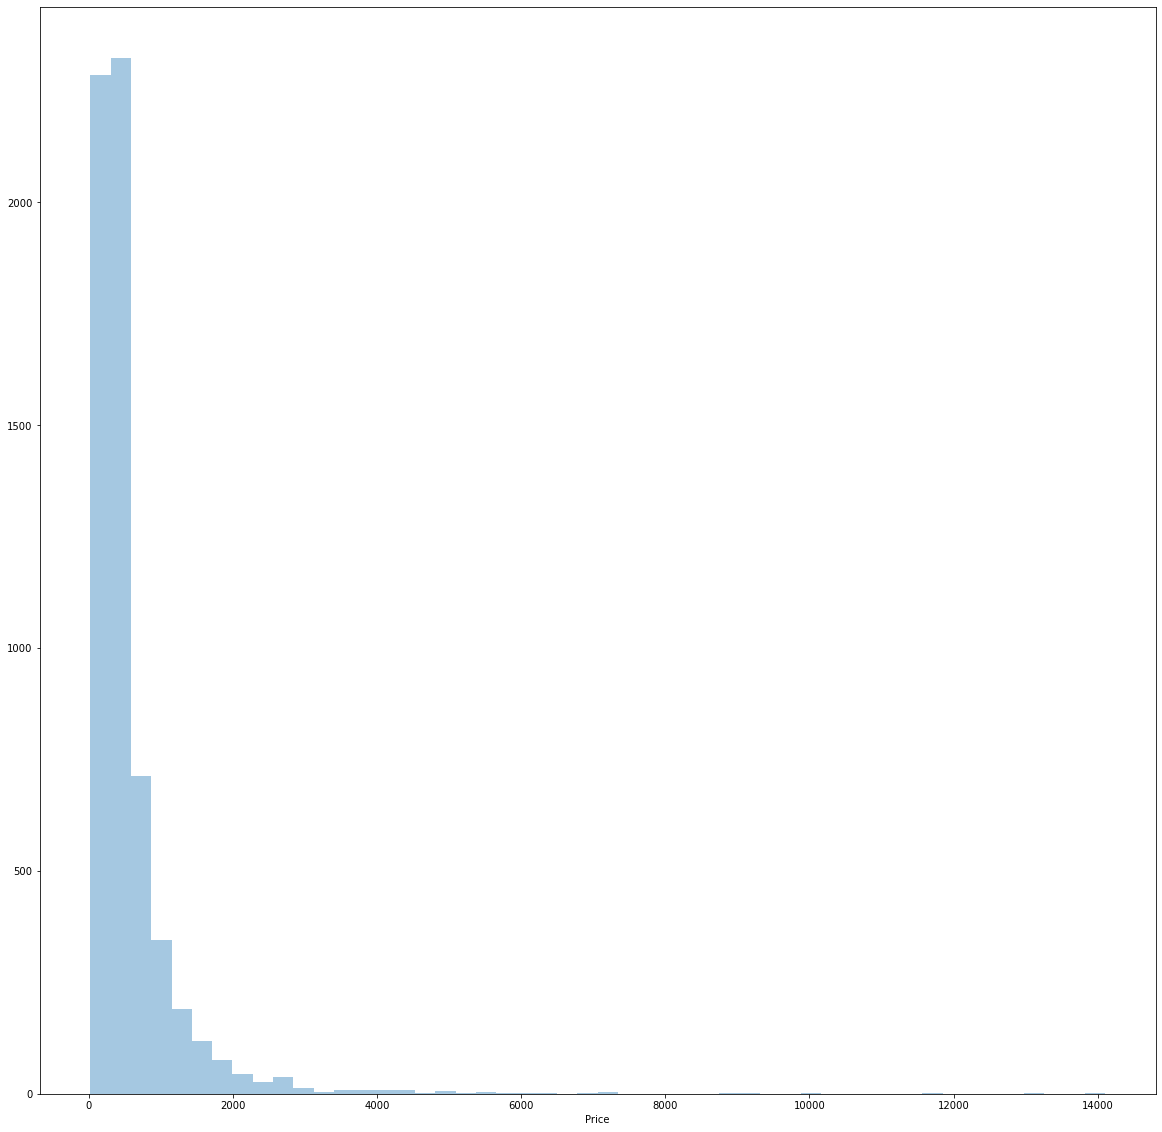

In [21]:
# seaborn histogram
plt.figure(figsize=(20,20))
sns.distplot(data['Price'], kde=False)
plt.show()

We can notice here that more than 70% of the dataset's books price belongs to range[0,500]

## Price and Ratings

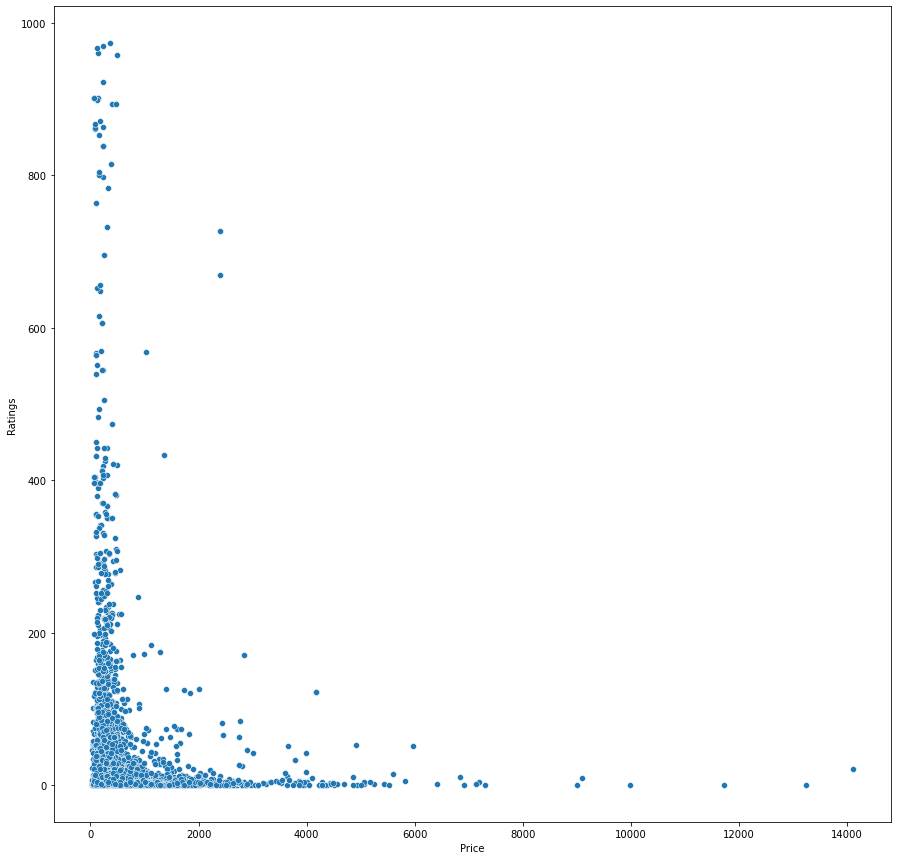

In [22]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="Price", y="Ratings", data=data)
plt.show()

**As you can see, a large number of ratings means that the book is cheaper, which is normal since that the less it costs, the more people will buy it.**

Now Im going to look into some of the "outliers"

In [23]:
data[(data['Price'] >= 2000) & (data['Ratings'] >= 20)]

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,EditionName,EditionDate,EditionSub
27,The Buddha Box Set,Osamu Tezuka,4.3,34.0,The classic eight volume graphic novel series ...,Comics & Graphic Novels (Books),Comics & Mangas,3779.00,Paperback,2014-06-15,Box set
93,AWS Certified Solutions Architect Official Stu...,Joe Baron,4.1,171.0,Validate your AWS skills. This is your opportu...,IT Certification Exams,"Computing, Internet & Digital Media",2846.00,Paperback,2016-11-29,NaN
183,Excel 2013 Bible,John Walkenbach,4.2,46.0,Excel at Excel with the help of this bestselli...,Software & Business Applications (Books),"Computing, Internet & Digital Media",2905.00,Paperback,2013-03-5,Unabridged
251,Little Black Classics Box Set (Penguin Little ...,Various,4.0,27.0,"In celebration of Penguin's 80th birthday, thi...",Asian Literature,"Biographies, Diaries & True Accounts",2742.00,Paperback,2015-11-24,NaN
377,The Study Quran: A New Translation and Commentary,Joseph E.B. Lumbard,4.3,20.0,An accessible and accurate translation of the ...,Action & Adventure (Books),Action & Adventure,2216.63,Hardcover,2015-11-17,NaN
895,Python Machine Learning By Example,Yuxi (Hayden) Liu,4.3,26.0,Take tiny steps to enter the big world of data...,Python Programming,"Computing, Internet & Digital Media",2798.00,Paperback,2017-05-31,Import
2006,Longman Dictionary of Contemporary English New...,Pearson Education Limited,4.6,52.0,The Longman Dictionary of Contempory English (...,Language Learning & Teaching (Books),"Language, Linguistics & Writing",3647.00,Paperback,2008-08-26,NaN
2343,Pearson Test of English Academic Practice Test...,"Ms Kate Chandler, Ms Lisa da Silva, Mr Simon C...",4.0,126.0,PTE Academic Practice Tests Plus includes:\n •...,Linguistics (Books),"Language, Linguistics & Writing",2000.00,Paperback,2013-02-28,Import
2359,Death Note Box Set (Vol.s 1-13): Volumes 1 - 12,Tsugumi Ohba,4.5,43.0,The entire Death Note manga story arc is now a...,Mangas,Comics & Mangas,3990.00,Paperback,2008-10-7,Box set
2455,The Complete Asterix Box Set (36 Titles),Rene Goscinny,4.9,22.0,"Composed of thirty six, four-colour albums in ...",Comics & Graphic Novels (Books),Comics & Mangas,14100.00,Product Bundle,2016-08-26,NaN


**Well I think I understand why we have such outliers : it's because most of them are a collection of books, so we don't buy only one book but many. 
To conclude : We have to add one feature which represent the number of books that we are going to buy. The number is going to be extracted via the title or via the Synopsis**

## Price and Reviews

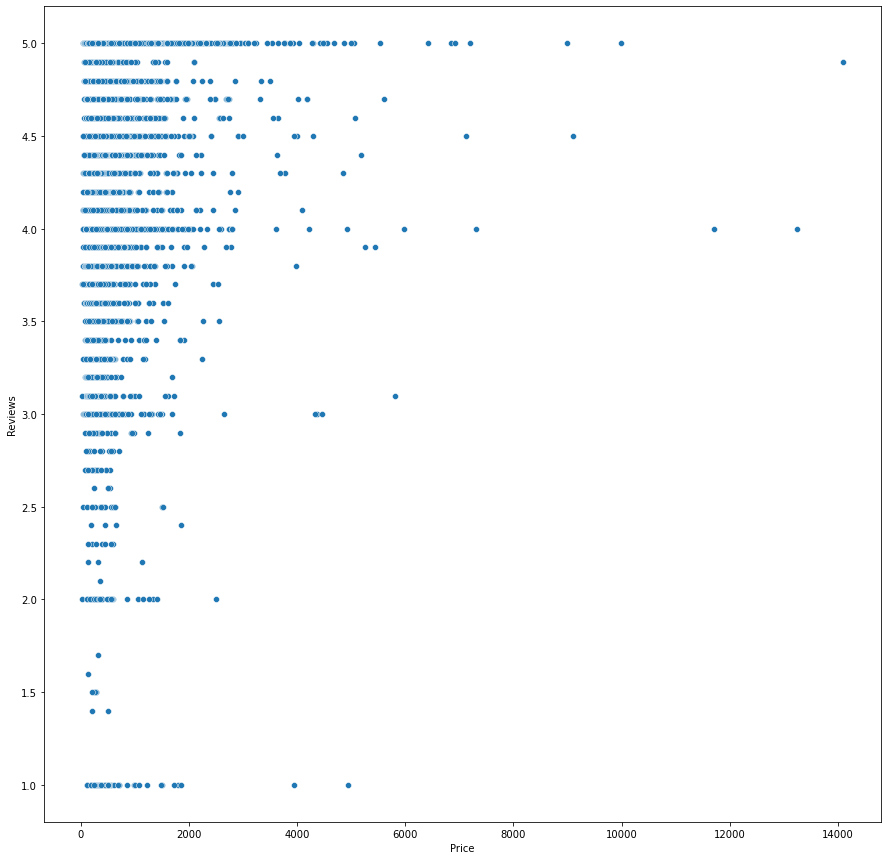

In [24]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="Price", y="Reviews", data=data)
plt.show()

## Price and EditionSub

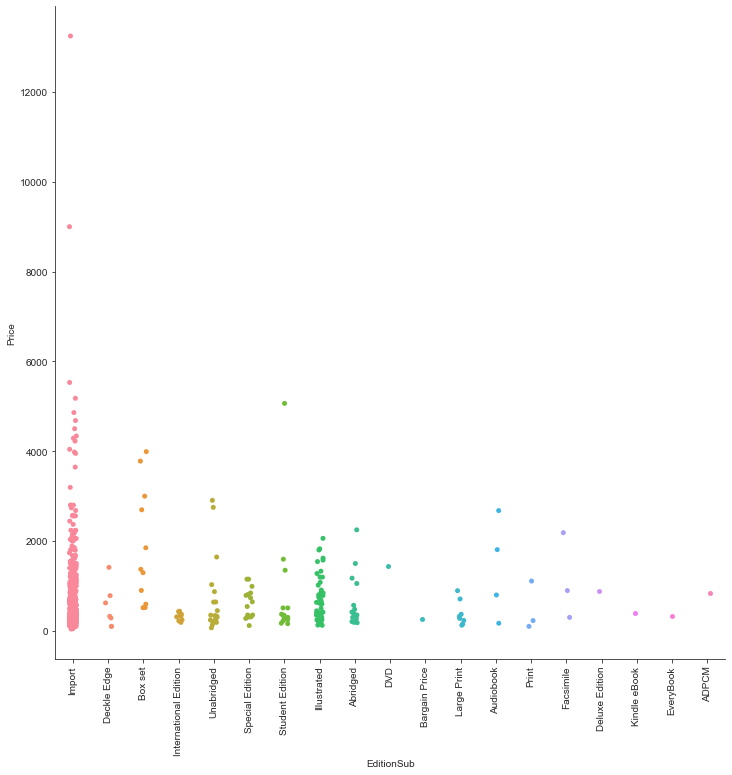

In [25]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.stripplot(x="EditionSub", y="Price", data=data, ax=ax)
plt.xticks(rotation=90)
sns.despine()

Well, I think it will be a good idea to use the edition sub as a feature since it gives a range of the price for some books (for example : For Internation Edition, the price is from 0 to 300 ..

## BookCategory

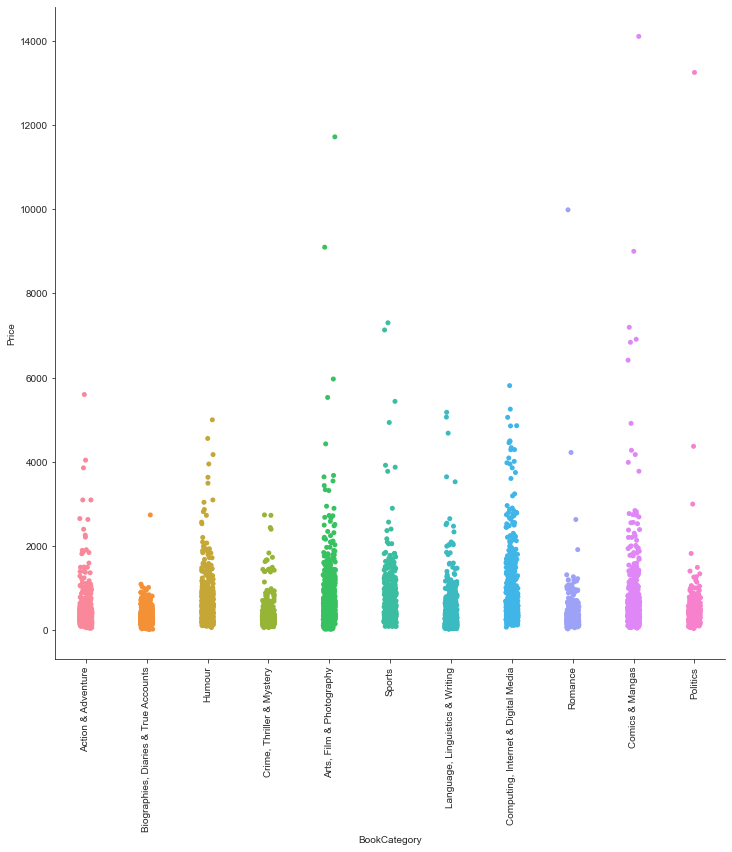

In [26]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.stripplot(x="BookCategory", y="Price", data=data, ax=ax)
plt.xticks(rotation=90)
sns.despine()

## Price and Date

In [27]:
df = data[['EditionDate', 'Price', 'EditionName']]
df.loc[:,'EditionDate'] = pd.to_datetime(df.EditionDate)
df = df.sort_values('EditionDate', ascending=True).dropna()
df['month'] = df['EditionDate'].dt.to_period('M')
df['year'] = df['EditionDate'].dt.to_period('Y')

/Users/omarsouaidi/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


#### Yearly and By Edition

In [28]:
df_year = df[['year', 'Price', 'EditionName']]
df_year = df_year.groupby(['year','EditionName']).mean().reset_index()

In [29]:
df_year.EditionName.value_counts()

Paperback                53
Mass Market Paperback    38
Hardcover                32
Cards                     7
Flexibound                6
Sheet music               4
Spiral-bound              4
Loose Leaf                2
Tankobon Softcover        2
(Spanish)                 1
Product Bundle            1
(Kannada)                 1
Board book                1
Leather Bound             1
(French)                  1
Library Binding           1
(German)                  1
Perfect Paperback         1
Name: EditionName, dtype: int64

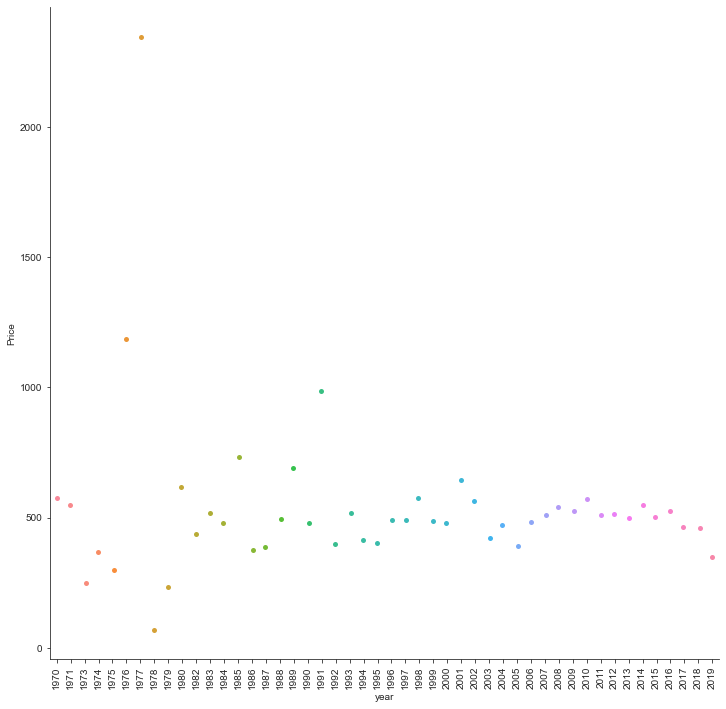

In [30]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.stripplot(x='year', y="Price", data=df_year[df_year.EditionName=='Paperback'][5:], ax=ax)
plt.xticks(rotation=90)
sns.despine()

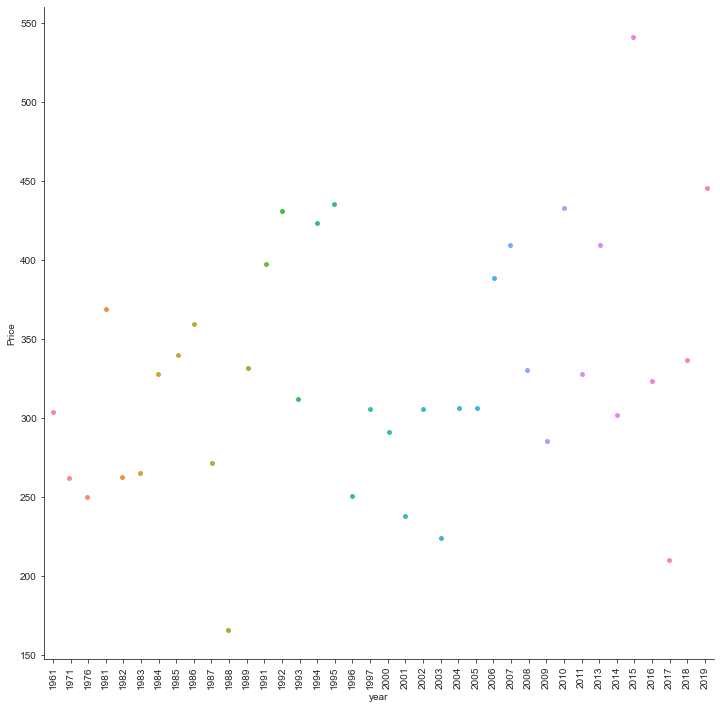

In [31]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.stripplot(x='year', y="Price", data=df_year[df_year.EditionName=='Mass Market Paperback'], ax=ax)
plt.xticks(rotation=90)
sns.despine()

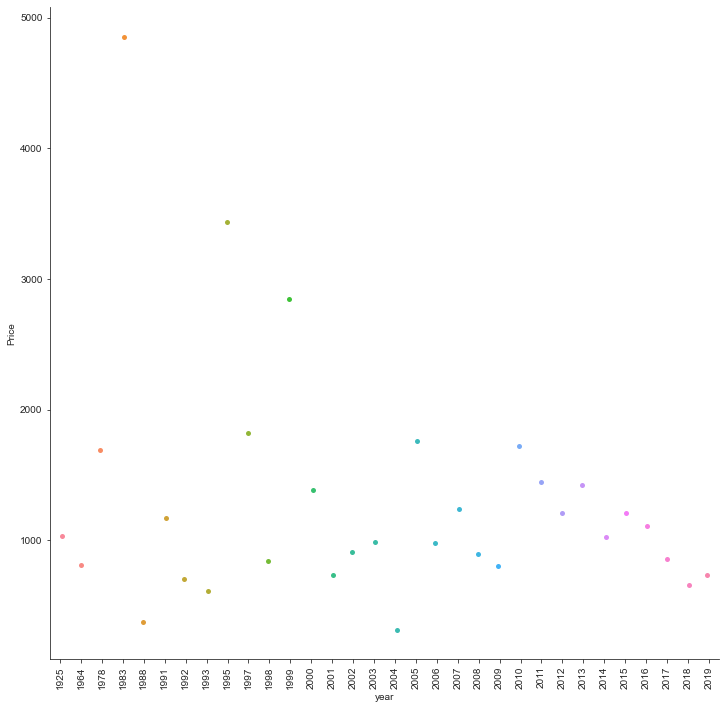

In [32]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.stripplot(x='year', y="Price", data=df_year[df_year.EditionName=='Hardcover'], ax=ax)
plt.xticks(rotation=90)
sns.despine()

**I can't see any trend/seasonality when I look at the evolution of the price by year and by edition, it's not really relevant as feature**

#### Monthly and By Edition

In [33]:
df_month = df[['year', 'month', 'Price', 'EditionName']]
df_month = df_month.groupby(['year', 'month', 'EditionName']).mean().reset_index()

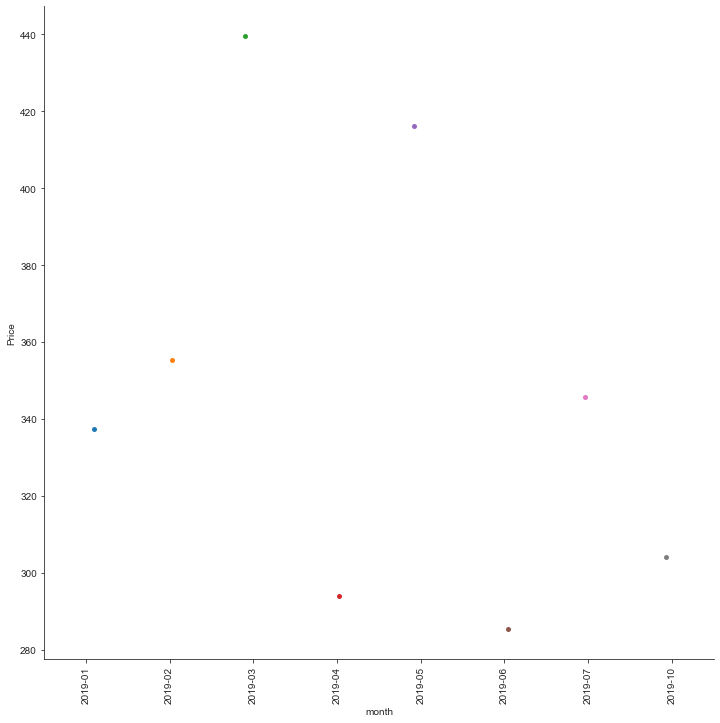

In [34]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.stripplot(x='month', y="Price", data=df_month[(df_month.EditionName == 'Paperback') & (df_month.year.dt.year == 2019)], ax=ax)
plt.xticks(rotation=90)
sns.despine()

**This is a dead end, I tried to do more visualisation, but I can't see any monthly trend, (nor seasonality)
Unfortunately, I wanted to encore three or two time variables (month and the year) but it is useless .. Well sometimes you think you'll find something but at the end there is nothing haha**

In [35]:
data.loc[:,'EditionDate'] = pd.to_datetime(data.EditionDate)
data_submit.loc[:,'EditionDate'] = pd.to_datetime(data_submit.EditionDate)

## Price and Author

In [36]:
data.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,EditionName,EditionDate,EditionSub
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016-03-10,NaN
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012-11-07,NaN
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982-02-25,NaN
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017-10-05,NaN
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006-10-10,NaN


In [37]:
author_to_consider = [x for x in data.Author.unique() if x in data_submit.Author.unique()]

In [38]:
df = data[data['Author'].isin(author_to_consider)]
df.Author.value_counts()

Agatha Christie                  69
Ladybird                         49
DK                               48
Herge                            34
Albert Uderzo                    34
                                 ..
Elizabeth Gaskell                 1
Preet Bharara                     1
Ivan Hissey, Curtis Tappenden     1
David Harland Rousseau            1
Ryan Foley                        1
Name: Author, Length: 531, dtype: int64

## Title

In [49]:
for index, row in data[data.Price < 100].sample(n=10).iterrows():
    print(row['Title'])
    print(row['Price'])
    print('-'*50)

Extreme Copy Colour - Sea World
70.0
--------------------------------------------------
1984
94.0
--------------------------------------------------
Writing Skills: Success in 20 Minutes a Day
57.0
--------------------------------------------------
The Invisible Man
99.0
--------------------------------------------------
School Essays, Letters, Paragraphs, Comprehension and Stories (For Middle Classes)
64.0
--------------------------------------------------
Life is What You Make It
80.0
--------------------------------------------------
Junior English Translation
40.0
--------------------------------------------------
Tinkle Double Digest No. 8
90.0
--------------------------------------------------
You Never Know When You'll Get Lucky!
84.0
--------------------------------------------------
Know About Napoleon
40.0
--------------------------------------------------


In [51]:
for index, row in data[(data.Price >= 100) & (data.Price < 200)].sample(n=10).iterrows():
    print(row['Title'])
    print(row['Price'])
    print('-'*50)

Love in Olive Greens
125.0
--------------------------------------------------
JAVA/J2EE: Interview Questions (With Set of 2 CDs)
150.0
--------------------------------------------------
Mrs Funnybones
181.0
--------------------------------------------------
The Master's Tools Will Never Dismantle the Master's House (Penguin Modern)
146.0
--------------------------------------------------
The Cricket Fanatics Essential Guide
146.0
--------------------------------------------------
The Dhoni Touch: Unravelling the Enigma That Is Mahendra Singh Dhoni
144.0
--------------------------------------------------
The People vs. Alex Cross: (Alex Cross 25)
177.0
--------------------------------------------------
Small Acts of Freedom
166.0
--------------------------------------------------
Mini Shopaholic (Shopaholic Book 6)
199.0
--------------------------------------------------
My Inventions: The Autobiography of Nikola Tesla (Hardbound Delux Edition)
196.0
------------------------------------

In [52]:
for index, row in data[(data.Price >= 200) & (data.Price < 400)].sample(n=10).iterrows():
    print(row['Title'])
    print(row['Price'])
    print('-'*50)

The Stranger
205.0
--------------------------------------------------
Fifty Great Short Stories (Bantam Classics)
228.0
--------------------------------------------------
Stranger in the Mirror
215.0
--------------------------------------------------
Fantastically Great Women Who Made History
215.0
--------------------------------------------------
Half-Lion: How P V Narasimha Rao Transformed India
352.0
--------------------------------------------------
India Cried That Night: Untold Tales of Freedom’s Foot Soldiers
220.0
--------------------------------------------------
I Am Malala: The Girl Who Stood Up for Education and was Shot by the Taliban
299.0
--------------------------------------------------
Anil's Ghost
381.22
--------------------------------------------------
Calvin And Hobbes Volume 2: One Day the Wind Will Change: The Calvin & Hobbes Series
283.0
--------------------------------------------------
Dipa Karmakar: The Small Wonder (India's First Ever Female Gymnast to Com

In [53]:
for index, row in data[(data.Price >= 400) & (data.Price < 800)].sample(n=10).iterrows():
    print(row['Title'])
    print(row['Price'])
    print('-'*50)

Jerusalem: The Biography
540.0
--------------------------------------------------
The Ultimate History of Video Games: from Pong to Pokemon and beyond...the story behind the craze that touched our lives and changed the world
749.0
--------------------------------------------------
The Complete Guide to Drones Extended 2nd Edition
471.0
--------------------------------------------------
The Thrilling Adventures of Lovelace and Babbage: The (Mostly) True Story of the First Computer
580.0
--------------------------------------------------
Introvert Doodles: An Illustrated Look at Introvert Life in an Extrovert World
616.0
--------------------------------------------------
Amphigorey Too
799.0
--------------------------------------------------
Collected Short Stories Volume 2 (Vintage Classics) (Maugham Short Stories)
435.0
--------------------------------------------------
Miraculous: Tales of Ladybug and Cat Noir: Spots on
661.0
--------------------------------------------------
Complete

In [54]:
for index, row in data[(data.Price >= 800) & (data.Price < 1500)].sample(n=10).iterrows():
    print(row['Title'])
    print(row['Price'])
    print('-'*50)

Islamic Patterns: An Analytical and Cosmological Approach
1422.0
--------------------------------------------------
While the Light Lasts (The Agatha Christie Collection)
896.0
--------------------------------------------------
Batman: The Dark Knight Returns
1036.0
--------------------------------------------------
Cruel Beauty
991.0
--------------------------------------------------
Batman: White Knight
1137.0
--------------------------------------------------
Tell Me Your Dreams
1290.66
--------------------------------------------------
Philographics: Big Ideas in Simple Shapes
1445.0
--------------------------------------------------
Enterprise Application Architecture with .NET Core
1399.0
--------------------------------------------------
Twenty Years' Crisis, 1919-1939
850.0
--------------------------------------------------
Figuring
900.0
--------------------------------------------------


In [55]:
for index, row in data[(data.Price >= 1500) & (data.Price < 4000)].sample(n=10).iterrows():
    print(row['Title'])
    print(row['Price'])
    print('-'*50)

Wooden on Leadership
1854.0
--------------------------------------------------
Deep Learning (Adaptive Computation and Machine Learning series)
2450.0
--------------------------------------------------
SAP Performance Optimization Guide: Analyzing and Tuning SAP Systems
2000.0
--------------------------------------------------
How to Render
2384.0
--------------------------------------------------
Everything is Inside
2500.0
--------------------------------------------------
Park Bench
1513.0
--------------------------------------------------
Tintin: The Complete Companion: The Complete Guide to Tintin's World (The Adventures of Tintin)
2767.0
--------------------------------------------------
Kafka: The Definitive Guide- Real-Time Data and Stream Processing at Scale
1600.0
--------------------------------------------------
Punisher Max Complete Collection Vol. 1 (The Punisher: Max Comics)
1974.0
--------------------------------------------------
Tennis Anatomy
1828.0
-----------------

In [56]:
for index, row in data[data.Price >= 4000].sample(n=10).iterrows():
    print(row['Title'])
    print(row['Price'])
    print('-'*50)

The Complete Calvin and Hobbes (Set of 4 Books)
4175.0
--------------------------------------------------
The Tintin Collection: The Adventure of Tintin (The Adventures of Tintin - Compact Editions)
5968.0
--------------------------------------------------
ABAP Development for SAP HANA
4292.0
--------------------------------------------------
Fifty Cars that Changed the World: Design Museum Fifty
11715.12
--------------------------------------------------
Modern Labor Economics: Theory and Public Policy (The Addison-Wesley Series in Economics)
13244.67
--------------------------------------------------
Born to Ice
5530.0
--------------------------------------------------
Discovering Statistics Using R
5253.0
--------------------------------------------------
Webley Air Rifles 1925-2005
4936.0
--------------------------------------------------
Threat Modeling: Designing for Security
4013.0
--------------------------------------------------
Ranga Roopa: Gods. Words. Images
9096.0
-------

I can't see anything relevant

# BaseLine With PYCARET

Firt of all, I will use PYCARET as a baseline, Im gonna drop Title and Synopsis (because I think it's so much to handle (big unstructured data)

In [67]:
from pycaret.regression import *
reg1 = setup(data.drop(['Title',"Synopsis"],axis=1), target = 'Price', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             ignore_low_variance = True, combine_rare_levels = True, silent=True)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(6237, 9)"
3,Missing Values,True
4,Numeric Features,2
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4365, 857)"


In [68]:
compare_models(include = ['catboost', 'lightgbm', 'xgboost', 'rf'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,264.0680,429546.5609,634.6117,0.1963,0.5821,0.4704,4.6330
catboost,CatBoost Regressor,262.1445,428121.1931,634.2182,0.1957,0.5725,0.4615,3.9510
lightgbm,Light Gradient Boosting Machine,268.0376,432926.3691,636.0034,0.1937,0.6004,0.4870,0.1060
rf,Random Forest Regressor,263.2312,432157.7024,636.9445,0.1873,0.5917,0.4765,2.6720


PowerTransformedTargetRegressor(base_score=None, booster='gbtree',
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, gamma=None, gpu_id=None,
                                importance_type='gain',
                                interaction_constraints=None,
                                learning_rate=None, max_delta_step=None,
                                max_depth=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                n_estimators=100, n_jobs=-1,
                                nu...
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       n_estimators=100,
                                                       n_jobs=-1,
                                                    

In [70]:
# Take the 3 bests models
catb = create_model('catboost', verbose=False)
xgb = create_model('xgboost', verbose=False)
rf = create_model('rf', verbose=False)

In [71]:
# Blend all the 3 bests models
blend_all = blend_models(estimator_list = [catb, xgb, rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,279.8498,476900.0098,690.5795,0.1502,0.5646,0.4404
1,321.5033,636480.2304,797.7971,0.1657,0.6240,0.4922
2,217.4154,234531.0729,484.2841,0.2181,0.5395,0.4551
3,266.7597,720844.2931,849.0255,0.0794,0.5669,0.3934
4,241.5672,294612.8987,542.7826,0.2747,0.5445,0.4426
5,259.4660,454057.2678,673.8377,0.2208,0.5929,0.4856
6,309.0319,800346.3347,894.6208,0.0869,0.6313,0.5107
7,230.9310,197842.0330,444.7944,0.3557,0.5580,0.4852
8,231.9924,219866.2573,468.8990,0.2224,0.5575,0.4463
9,229.8179,208569.5953,456.6942,0.3021,0.5342,0.4156


In [73]:
# Finalise models and make predictions
final_blender = finalize_model(blend_all)
predictions = predict_model(final_blender, data = data_submit.drop(['Title',"Synopsis"],axis=1))
predictions.head()

,Author,Reviews,Ratings,Genre,BookCategory,EditionName,EditionDate,EditionSub,Label
0,Sir Arthur Conan Doyle,4.4,960.0,Short Stories (Books),"Crime, Thriller & Mystery",Mass Market Paperback,1986-10-01,NaN,273.762007
1,Gabriel N. Schenker,5.0,1.0,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback,2018-04-26,Import,1337.323894
2,Danielle Steel,5.0,4.0,Romance (Books),Romance,Paperback,2011-03-17,NaN,307.040688
3,Allen B. Downey,4.1,11.0,Programming & Software Development (Books),"Computing, Internet & Digital Media",Paperback,2016-01-01,NaN,578.196513
4,Redman Gairns,4.4,9.0,Linguistics (Books),"Language, Linguistics & Writing",Paperback,2011-12-26,NaN,352.928218


In [74]:
predictions['Price'] = predictions['Label']
predictions[['Price']].to_excel('submissions.xlsx', index=False)

**Actually, the score is 0.75861 (ranked 47) (link : https://www.machinehack.com/hackathons/predict_the_price_of_books/leaderboard) which is not bad. We will try to improve the score by analysing the Title and the Synopsis.**